In [2]:
import warnings

import astropy.units
import FunctionLib as FL
import inspect
from tqdm import tqdm
import astropy
import wave
from matplotlib.image import resample
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import defaultdict
import re
import scipy

mpl.rcParams['font.family'] = 'serif'


warnings.filterwarnings("ignore")

DJAv4Catalog = FL.Spectrum_Catalog()
DJAv4Catalog.load_from_pkl(os.path.expanduser(
    '~/DustCurve/DJAv4Catalog.pkl'))
print(DJAv4Catalog.sample_num())

DJAv4Catalog.to_dataframe()

459


,survey_id_subid,survey_id,prism_filepath,prism_redshift,grating_filepaths,grating_redshifts,determined_redshift,file_count,available_filters,properties
0,snh0pe-v4_4446_102,snh0pe-v4,/home/xingyaocai/DJAv4/snh0pe-v4/snh0pe-v4_pri...,0.2259,{'g235m-f170lp': '/home/xingyaocai/DJAv4/snh0p...,"{'g235m-f170lp': nan, 'g140m-f100lp': nan}",0.2259,3,"{prism-clear, g235m-f170lp, g140m-f100lp}","{'redshift_conflict': False, 'Sample_Flag': Fa..."
1,snh0pe-v4_4446_143,snh0pe-v4,/home/xingyaocai/DJAv4/snh0pe-v4/snh0pe-v4_pri...,1.6318,{'g235m-f170lp': '/home/xingyaocai/DJAv4/snh0p...,"{'g235m-f170lp': 1.6309, 'g140m-f100lp': 1.6313}",1.6311,3,"{prism-clear, g235m-f170lp, g140m-f100lp}","{'redshift_conflict': False, 'Sample_Flag': Fa..."
2,snh0pe-v4_4446_285,snh0pe-v4,/home/xingyaocai/DJAv4/snh0pe-v4/snh0pe-v4_pri...,0.4446,{'g235m-f170lp': '/home/xingyaocai/DJAv4/snh0p...,"{'g235m-f170lp': 0.4462, 'g140m-f100lp': 0.4462}",0.4462,3,"{prism-clear, g235m-f170lp, g140m-f100lp}","{'redshift_conflict': False, 'Sample_Flag': Fa..."
3,snh0pe-v4_4446_29,snh0pe-v4,/home/xingyaocai/DJAv4/snh0pe-v4/snh0pe-v4_pri...,1.7834,{'g235m-f170lp': '/home/xingyaocai/DJAv4/snh0p...,"{'g235m-f170lp': 1.7796, 'g140m-f100lp': 1.7799}",1.77975,3,"{prism-clear, g235m-f170lp, g140m-f100lp}","{'redshift_conflict': False, 'Sample_Flag': Fa..."
4,snh0pe-v4_4446_123,snh0pe-v4,/home/xingyaocai/DJAv4/snh0pe-v4/snh0pe-v4_pri...,1.7855,{'g235m-f170lp': '/home/xingyaocai/DJAv4/snh0p...,"{'g235m-f170lp': 1.7851, 'g140m-f100lp': 1.7855}",1.7855,3,"{prism-clear, g235m-f170lp, g140m-f100lp}","{'redshift_conflict': False, 'Sample_Flag': Fa..."
...,...,...,...,...,...,...,...,...,...,...
32564,ceers-ddt-v4_2750_1636,ceers-ddt-v4,/home/xingyaocai/DJAv4/ceers-ddt-v4/ceers-ddt-...,3.0592,{},{},3.0592,1,{prism-clear},"{'redshift_conflict': False, 'Sample_Flag': Fa..."
32565,ceers-ddt-v4_2750_3213,ceers-ddt-v4,/home/xingyaocai/DJAv4/ceers-ddt-v4/ceers-ddt-...,4.8013,{},{},4.8013,1,{prism-clear},"{'redshift_conflict': False, 'Sample_Flag': Fa..."
32566,ceers-ddt-v4_2750_340,ceers-ddt-v4,/home/xingyaocai/DJAv4/ceers-ddt-v4/ceers-ddt-...,0.9585,{},{},0.9585,1,{prism-clear},"{'redshift_conflict': False, 'Sample_Flag': Fa..."
32567,ceers-ddt-v4_2750_21413,ceers-ddt-v4,/home/xingyaocai/DJAv4/ceers-ddt-v4/ceers-ddt-...,2.1402,{},{},2.1402,1,{prism-clear},"{'redshift_conflict': False, 'Sample_Flag': Fa..."


In [ ]:

balmer_list=[]
beta_list=[]
redshift_list=[]
ratio_list=[]
for id, catalog in DJAv4Catalog.catalog_iterator():
    if not catalog['properties']['Sample_Flag']:
        continue

    if 'Halpha_Fit_Result' in catalog['properties'] and 'Hbeta_Fit_Result' in catalog['properties']:
        Halpha_Fit_Result = catalog['properties']['Halpha_Fit_Result']
        Hbeta_Fit_Result = catalog['properties']['Hbeta_Fit_Result']

        halpha_intensity = Halpha_Fit_Result['integrated_flux']
        hbeta_intensity = Hbeta_Fit_Result['integrated_flux']
        balmer=np.log(halpha_intensity/hbeta_intensity/2.88)
        balmer_list.append(balmer)
        beta_list.append(catalog['properties']['Power_Law_Fit']['Power_Law_Fit_Power_Index'])
        redshift_list.append(catalog['determined_redshift'])
        ratio_list.append(halpha_intensity/hbeta_intensity)

In [ ]:
balmer_list=np.array(balmer_list)
beta_list=np.array(beta_list)
redshift_list=np.array(redshift_list)
ratio_list=np.array(ratio_list)

In [ ]:
plt.scatter(balmer_list,redshift_list,s=3,alpha=0.5)
plt.xlim(-1,1)

In [ ]:
plt.scatter(redshift_list,ratio_list,s=10,alpha=0.5)
plt.ylim(1,5)
plt.hlines(2.88,3,7,color='red',linestyle='--')
plt.xlabel('Redshift')
plt.ylabel('Halpha/Hbeta Ratio')
plt.title('Halpha/Hbeta Ratio vs Redshift')

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(balmer_list, beta_list, s=10, alpha=0.5)
plt.xlim(-1,1)
plt.xlabel('Balmer decrement (Hα/Hβ)', fontsize=14)
plt.ylabel('Power-law index (β)', fontsize=14)
plt.title('Balmer Decrement vs Power-law Index', fontsize=16)

In [ ]:
plt.hist(balmer_list[((balmer_list>-1)& (balmer_list<1))], bins=30, alpha=0.5, color='blue', label='Balmer Ratio')
plt.xlabel('Balmer Ratio (log(Halpha/Hbeta/2.88))')
plt.ylabel('Number of Sources')
plt.title('Distribution of Balmer Ratio')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
np.where((balmer_list>-1)& (balmer_list<1))[0].shape

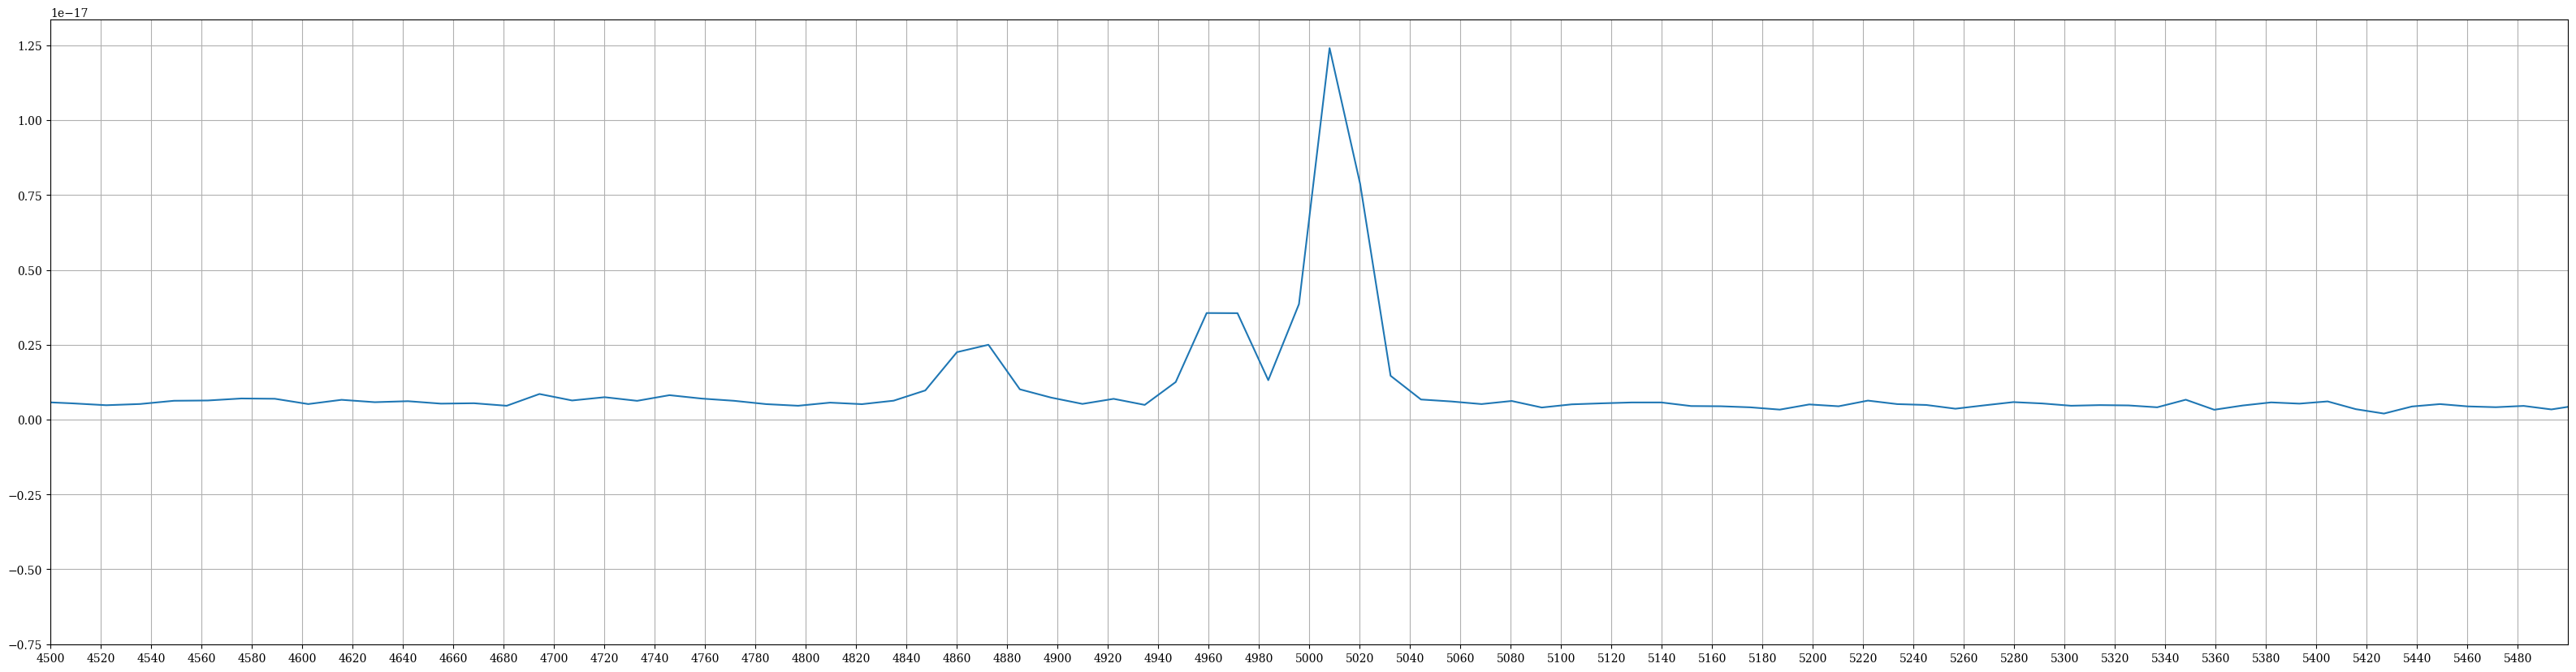

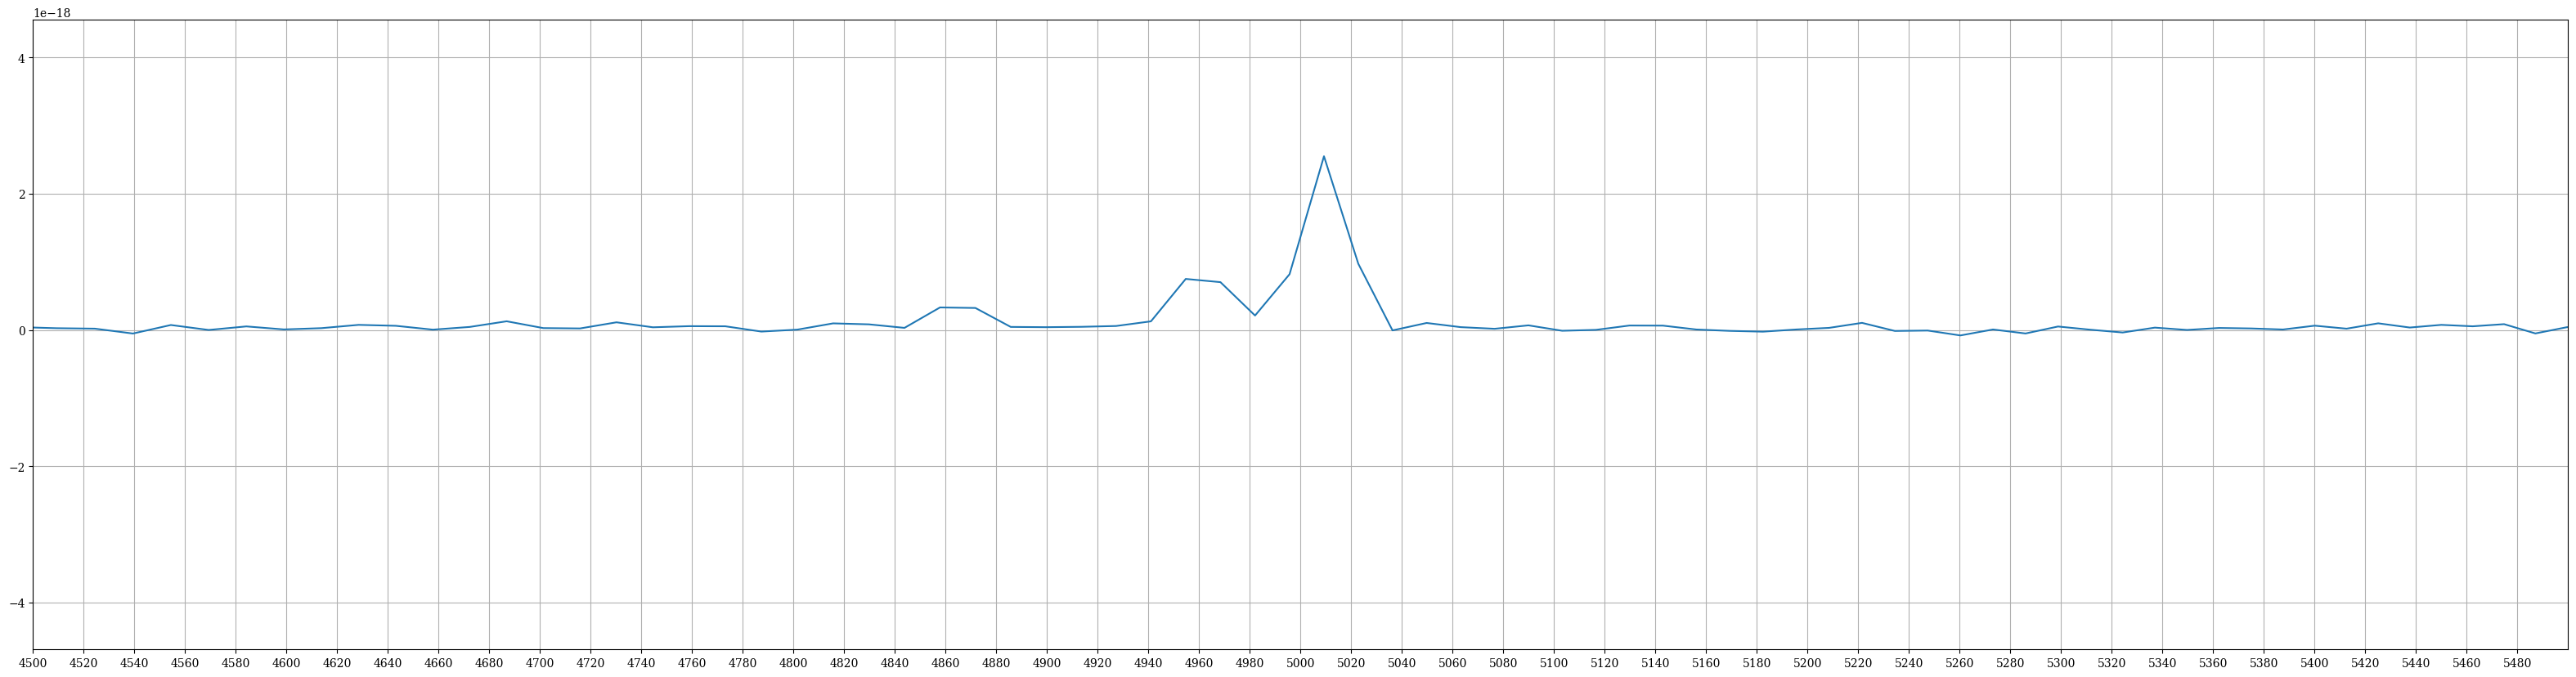

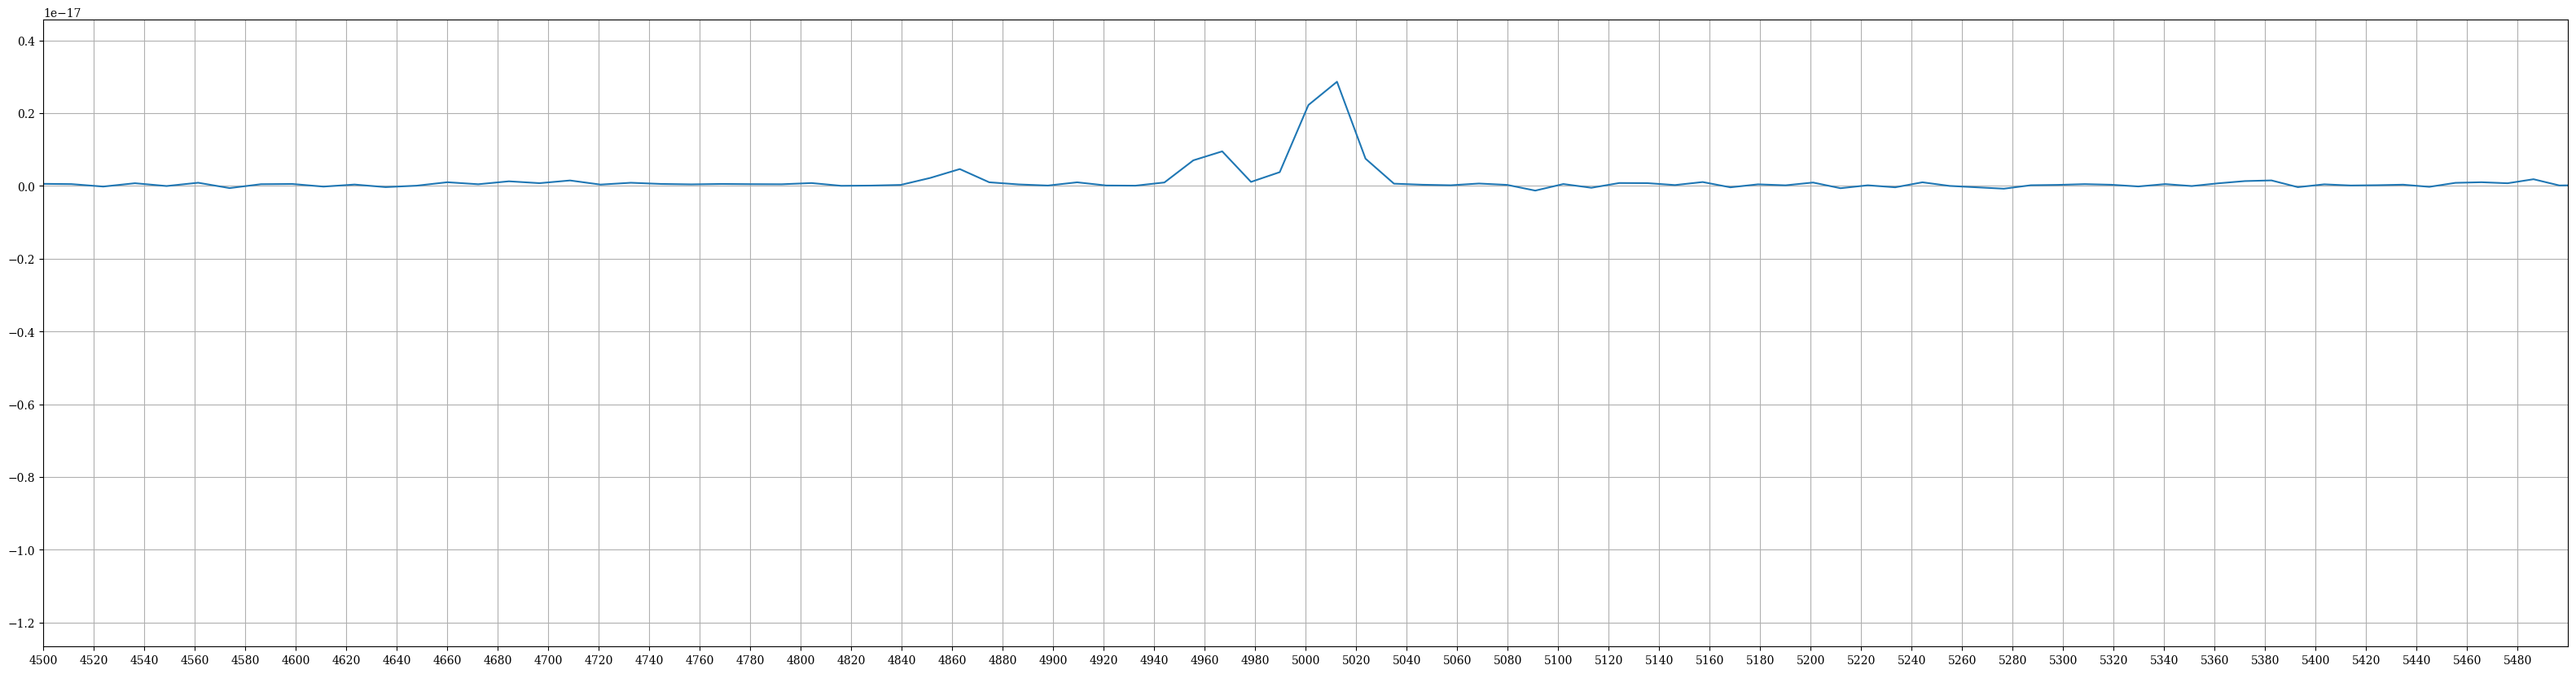

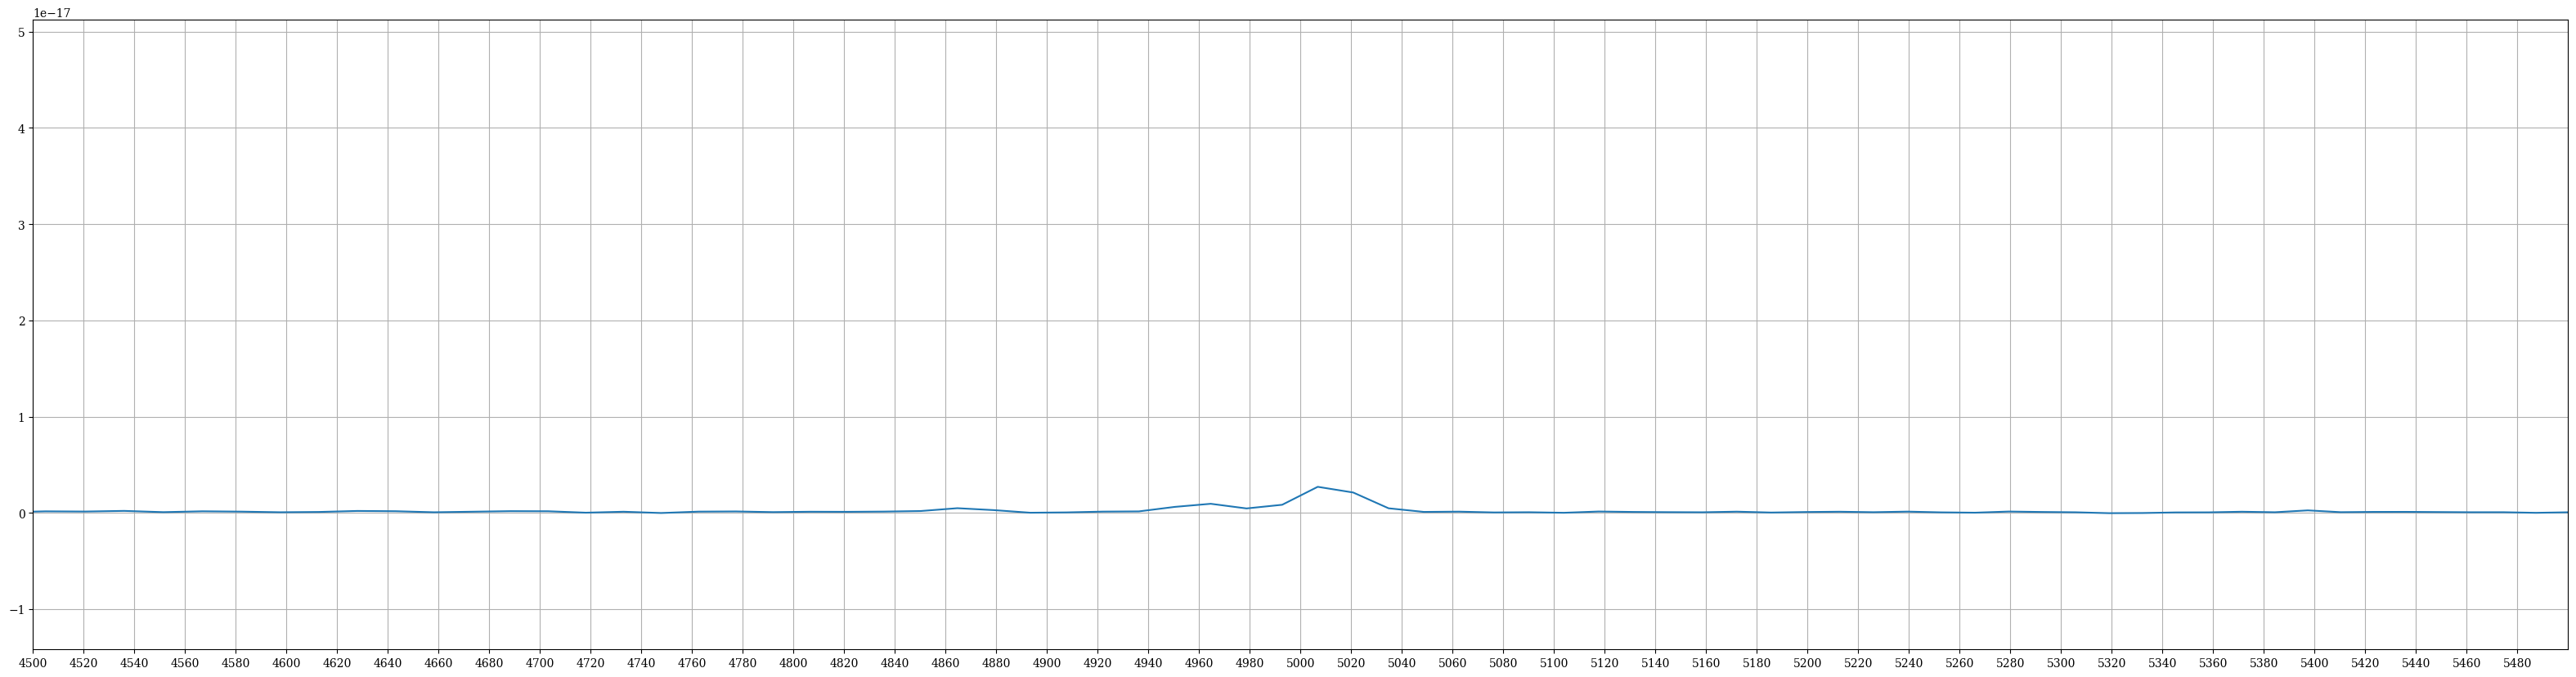

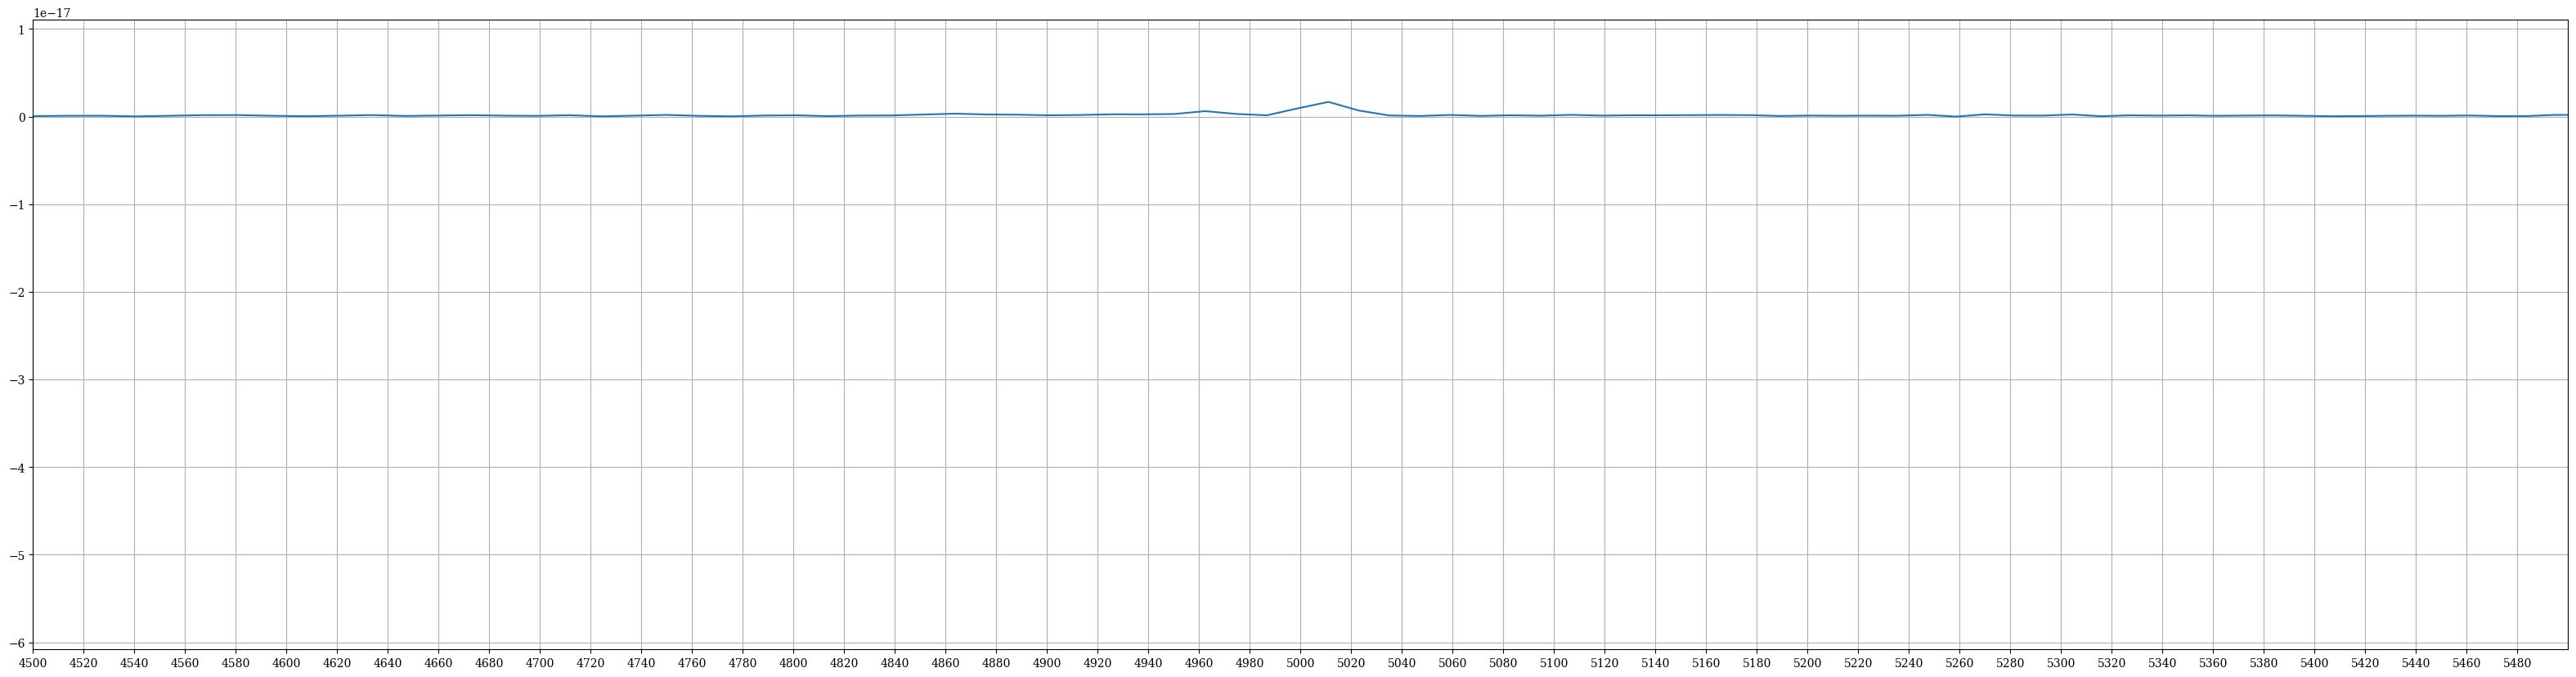

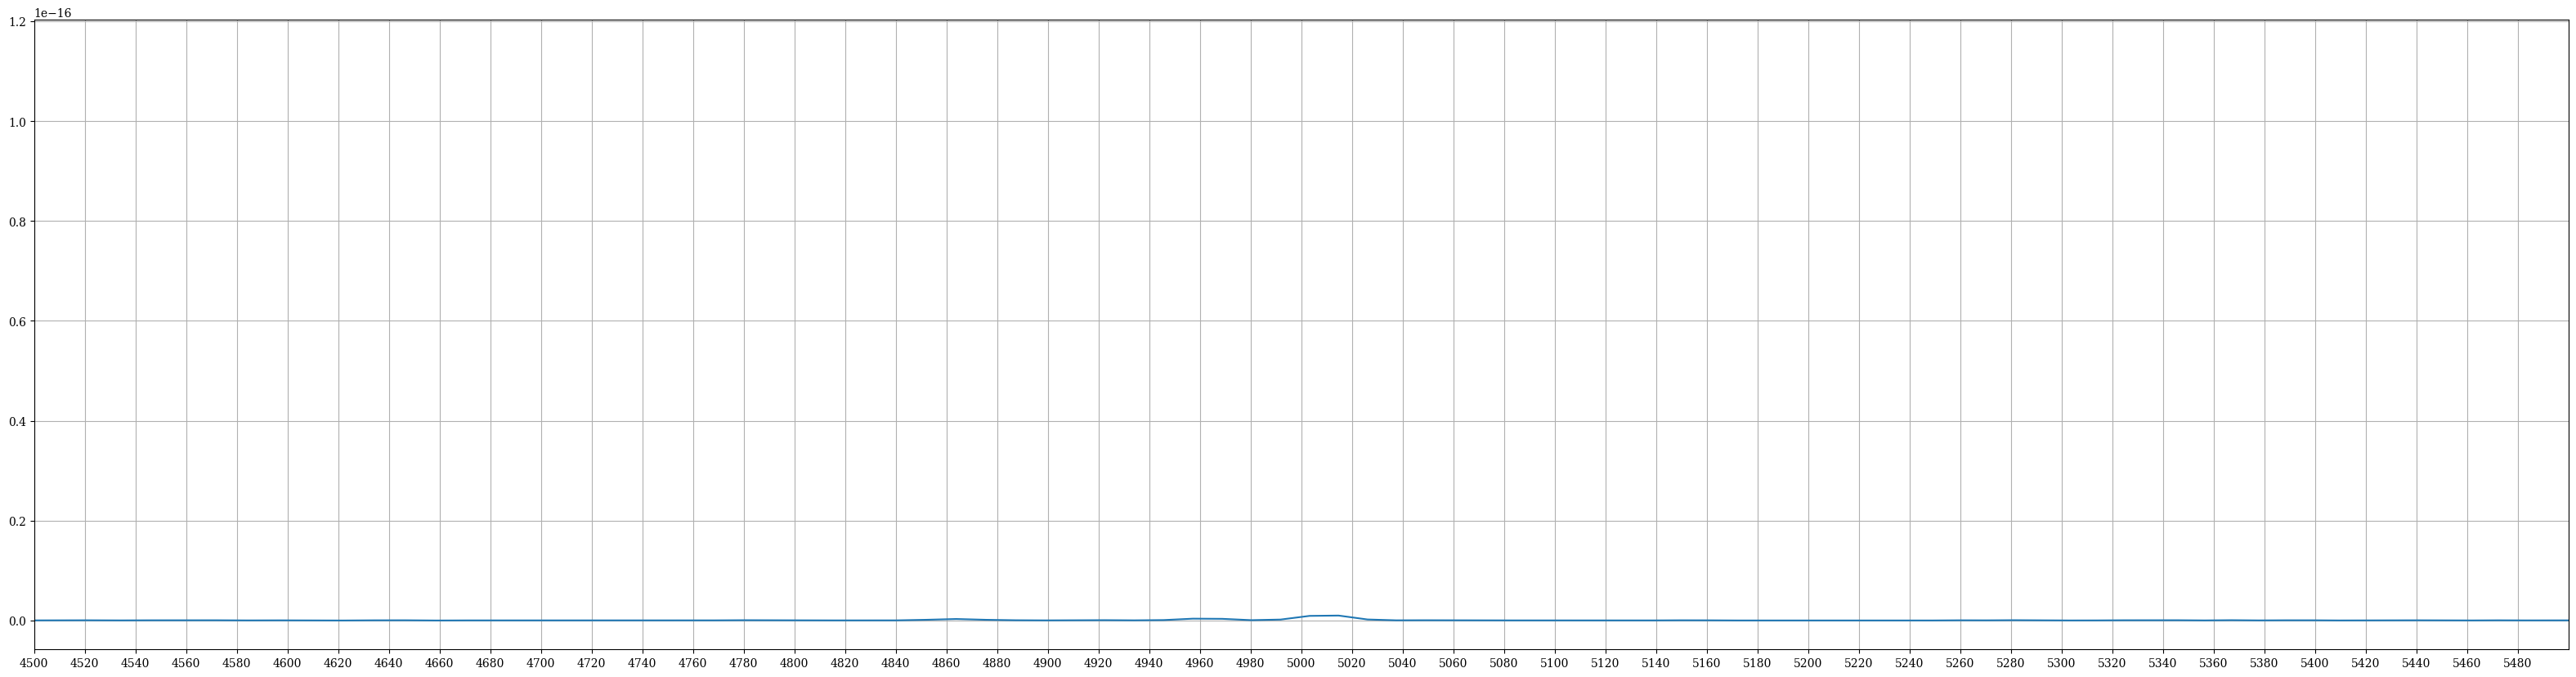

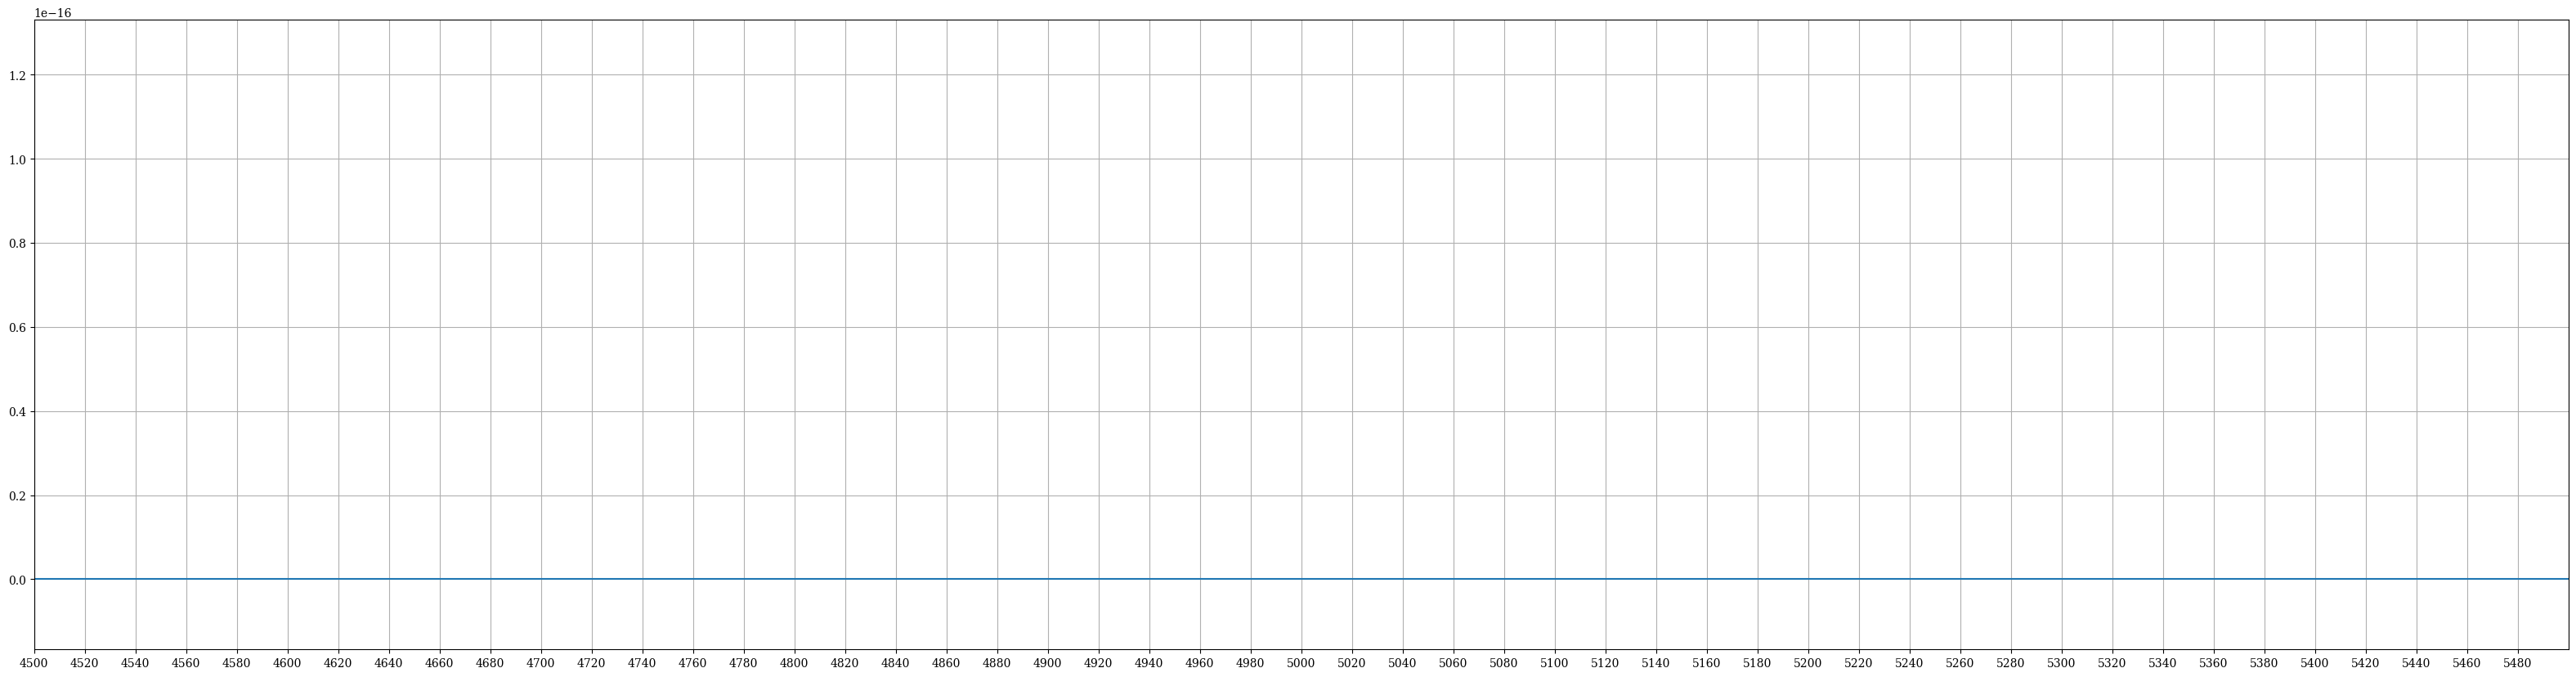

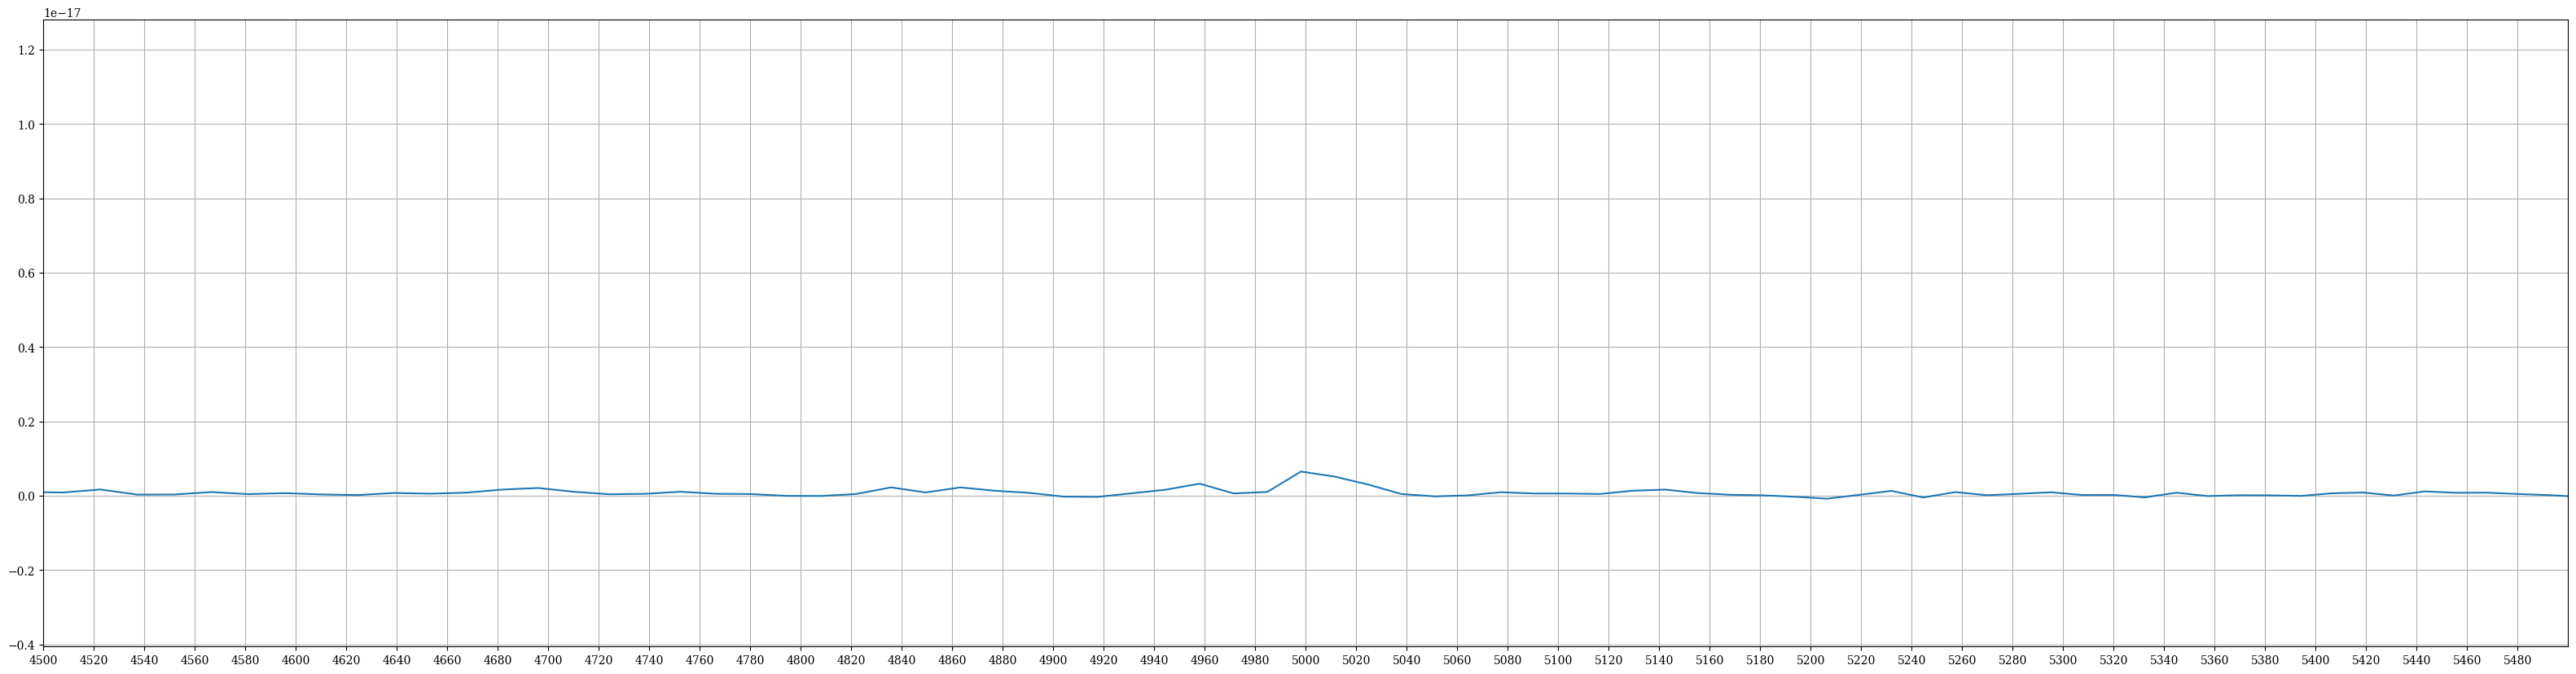

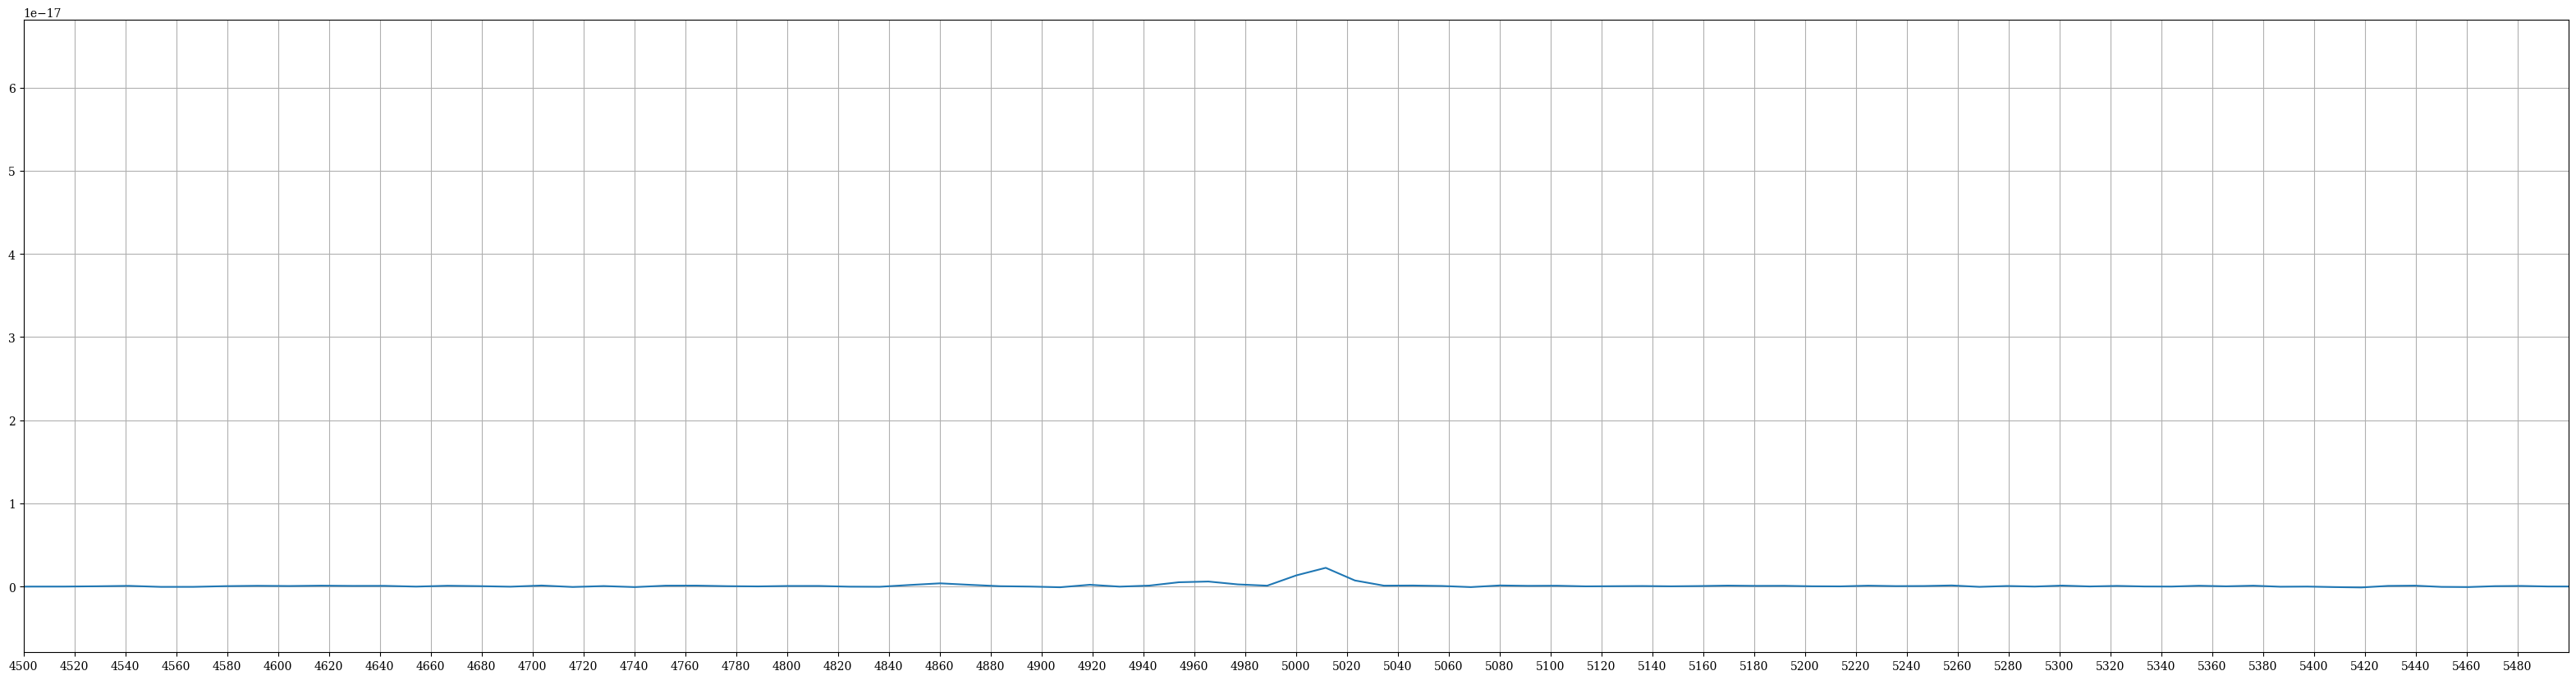

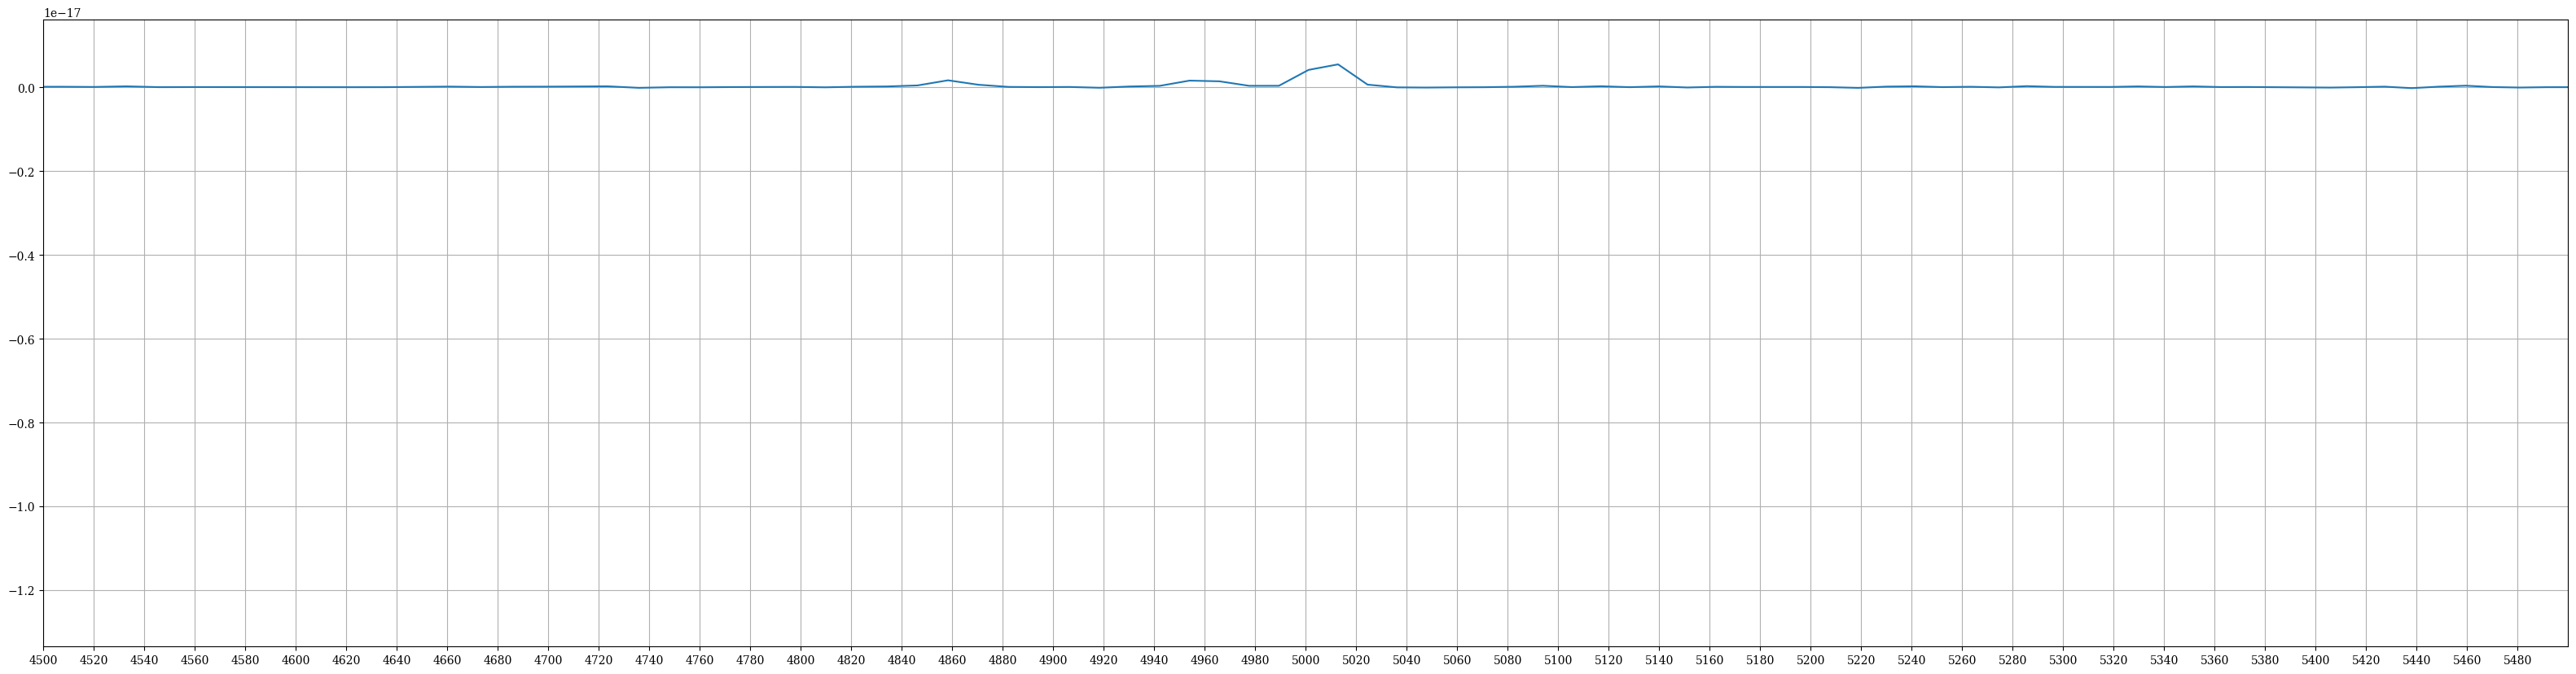

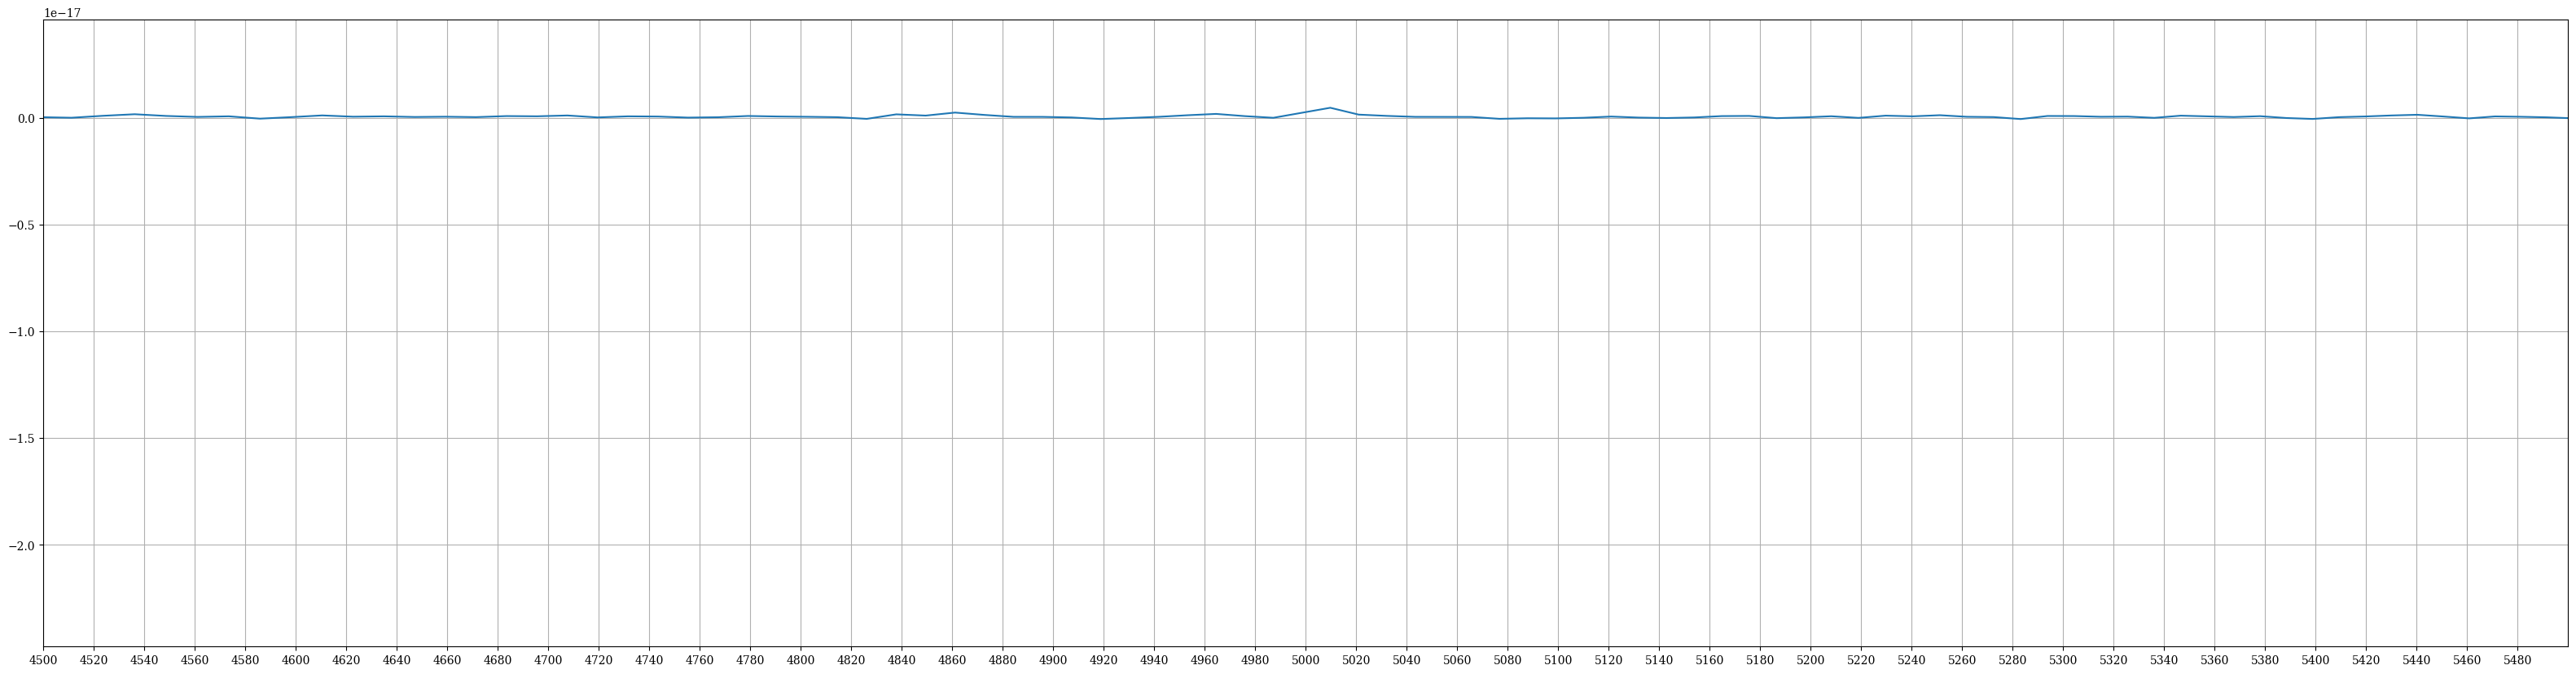

In [5]:
i=0
for id, catalog in DJAv4Catalog.catalog_iterator():
    if not catalog['properties']['Sample_Flag']:
        continue

    if catalog['determined_redshift']<6:
        continue

    spectrum=FL.Load_Spectrum_From_Fits(catalog['prism_filepath'],catalog['determined_redshift'])
    plt.figure(figsize=(40,10))
    plt.plot(spectrum.processing_wavelengths, spectrum.processing_flux)
    plt.xlim(4500,5500)
    plt.xticks(np.arange(4500, 5500, 20))
    plt.grid()
    plt.show()
    plt.close()
    i+=1
    if i>10:
        break
